In [1]:
# install library
!pip install pandas openpyxl nltk scikit-learn afinn xgboost SVM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.util import ngrams
from nltk import pos_tag


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Input dataset and define dataset size
# Simple EDA to check classes

# Dataset can be found in https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch/data
df = pd.read_csv('Suicide_Detection.csv') 
df=pd.read_csv('Suicide_Detection.csv')
print(df.shape)
df =df.head(20000) 
print(df.shape)
class_counts = df['class'].value_counts()
print(class_counts)
df.info()
#print(df['text'])

(232074, 3)
(20000, 3)
class
non-suicide    10135
suicide         9865
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20000 non-null  int64 
 1   text        20000 non-null  object
 2   class       20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.9+ KB


In [3]:
def text_preprocessing(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Removing punctuation and stopwords
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
    return ' '.join(tokens)

df['text'] = df['text'].apply(text_preprocessing)


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


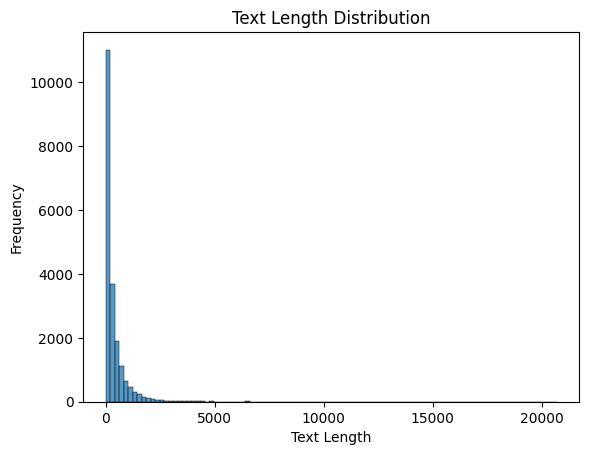

In [4]:
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], bins=100)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()


In [5]:
from collections import Counter

words = ' '.join(df['text']).split()
word_freq = Counter(words)

common_words = word_freq.most_common(20)
print(common_words)


[('like', 15453), ('want', 12714), ('know', 11126), ('feel', 10241), ('life', 10045), ('get', 9162), ('would', 7978), ('people', 7913), ('even', 7620), ('one', 7551), ('time', 7194), ('really', 7107), ('think', 6079), ('never', 5779), ('going', 5723), ('go', 5624), ('ca', 5444), ('day', 5150), ('fuck', 5148), ('friends', 5129)]



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


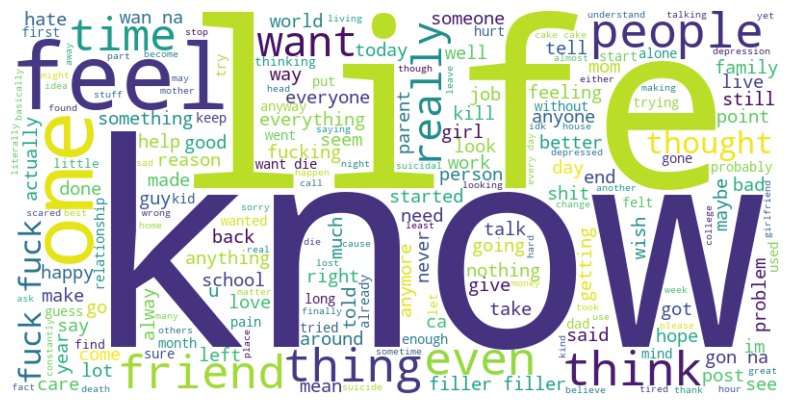

In [6]:
!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
